# TP1 AA1

🔷 **NyA: PORTAL, GUSTAVO GABRIEL**

🔷 **CARRERA: CS DE DATOS E IA**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

### 📊 Descripción del Dataset

El dataset **Seoul Bike Sharing Demand** fue recolectado por el **Gobierno Metropolitano de Seúl** y está orientado a estudiar el uso de sistemas de bicicletas compartidas en función de diferentes variables meteorológicas y temporales.

🧾 **Características principales:**
- Contiene **8760 registros**, correspondientes a mediciones **por hora** durante todo un año.
- Incluye variables numéricas continuas como:
  - `Temperature(°C)`
  - `Humidity(%)`
  - `Wind speed (m/s)`
  - `Visibility (10m)`
  - `Solar Radiation (MJ/m2)`
  - `Rainfall(mm)` y `Snowfall (cm)`
- También contiene variables categóricas como:
  - `Seasons` (Primavera, Verano, Otoño, Invierno)
  - `Holiday` (día festivo)
  - `Functioning Day` (día operativo)

🎯 **Variable objetivo:**  
`Rented Bike Count` — cantidad de bicicletas alquiladas.

In [ ]:
# 📥 Descarga y carga del dataset desde UCI Repository
import pandas as pd
# Descargar el ZIP si aún no está
!wget -nc https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip
# Descomprimir
!unzip -o seoul+bike+sharing+demand.zip
# Leer el CSV
df = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')
print("✅ Dataset cargado correctamente.")

File ‘seoul+bike+sharing+demand.zip’ already there; not retrieving.

Archive:  seoul+bike+sharing+demand.zip
 extracting: SeoulBikeData.csv       
✅ Dataset cargado correctamente.


In [ ]:
# Vista previa
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

Características principales del dataset: estructura, valores extremos y posibles relaciones entre variables. Esto permite orientar mejor el preprocesamiento y la elección de variables predictoras para el modelo.


In [ ]:
# Estructura general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Estadísticas descriptivas
df.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Valores nulos
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


## 📊 Análisis de Histogramas

Estos gráficos permiten observar cómo se distribuyen los valores y detectar sesgos, outliers o patrones útiles para el modelado.

### 🔥 `Rented Bike Count`
- Distribución sesgada a la derecha.
- La mayoría de las horas presentan entre 0 y 500 alquileres.
- Existen picos importantes de demanda, más de 2000 alquileres en algunas horas.

### 🕓 `Hour`
- Distribución uniforme: todas las horas aparecen con la misma frecuencia (~365 veces).
- ✅ Confirma que el dataset tiene datos horarios completos del año.

### 🌡️ `Temperature(°C)` y `Dew point temperature(°C)`
- Distribuciones cercanas a normales.
- Rango típico entre 0 y 20 °C.

### 💧 `Humidity(%)`
- Distribución ligeramente sesgada a la derecha.
- Muchas horas con humedad alta.

### 🌬️ `Wind speed (m/s)`
- Concentración en valores bajos (0 a 3 m/s).
- Pocas horas con viento fuerte.

### 👁️ `Visibility (10m)`
- La mayoría de los valores son máximos (2000).

### ☀️ `Solar Radiation (MJ/m2)`
- Más de 5000 horas del año tienen valores cercanos a 0
- Alta relación esperada con la actividad diurna en bicicleta.

### 🌧️ `Rainfall(mm)` y ❄️ `Snowfall(cm)`
- Distribuciones extremadamente sesgadas a la izquierda.
- La mayoría de las horas tienen 0 lluvia o nieve.

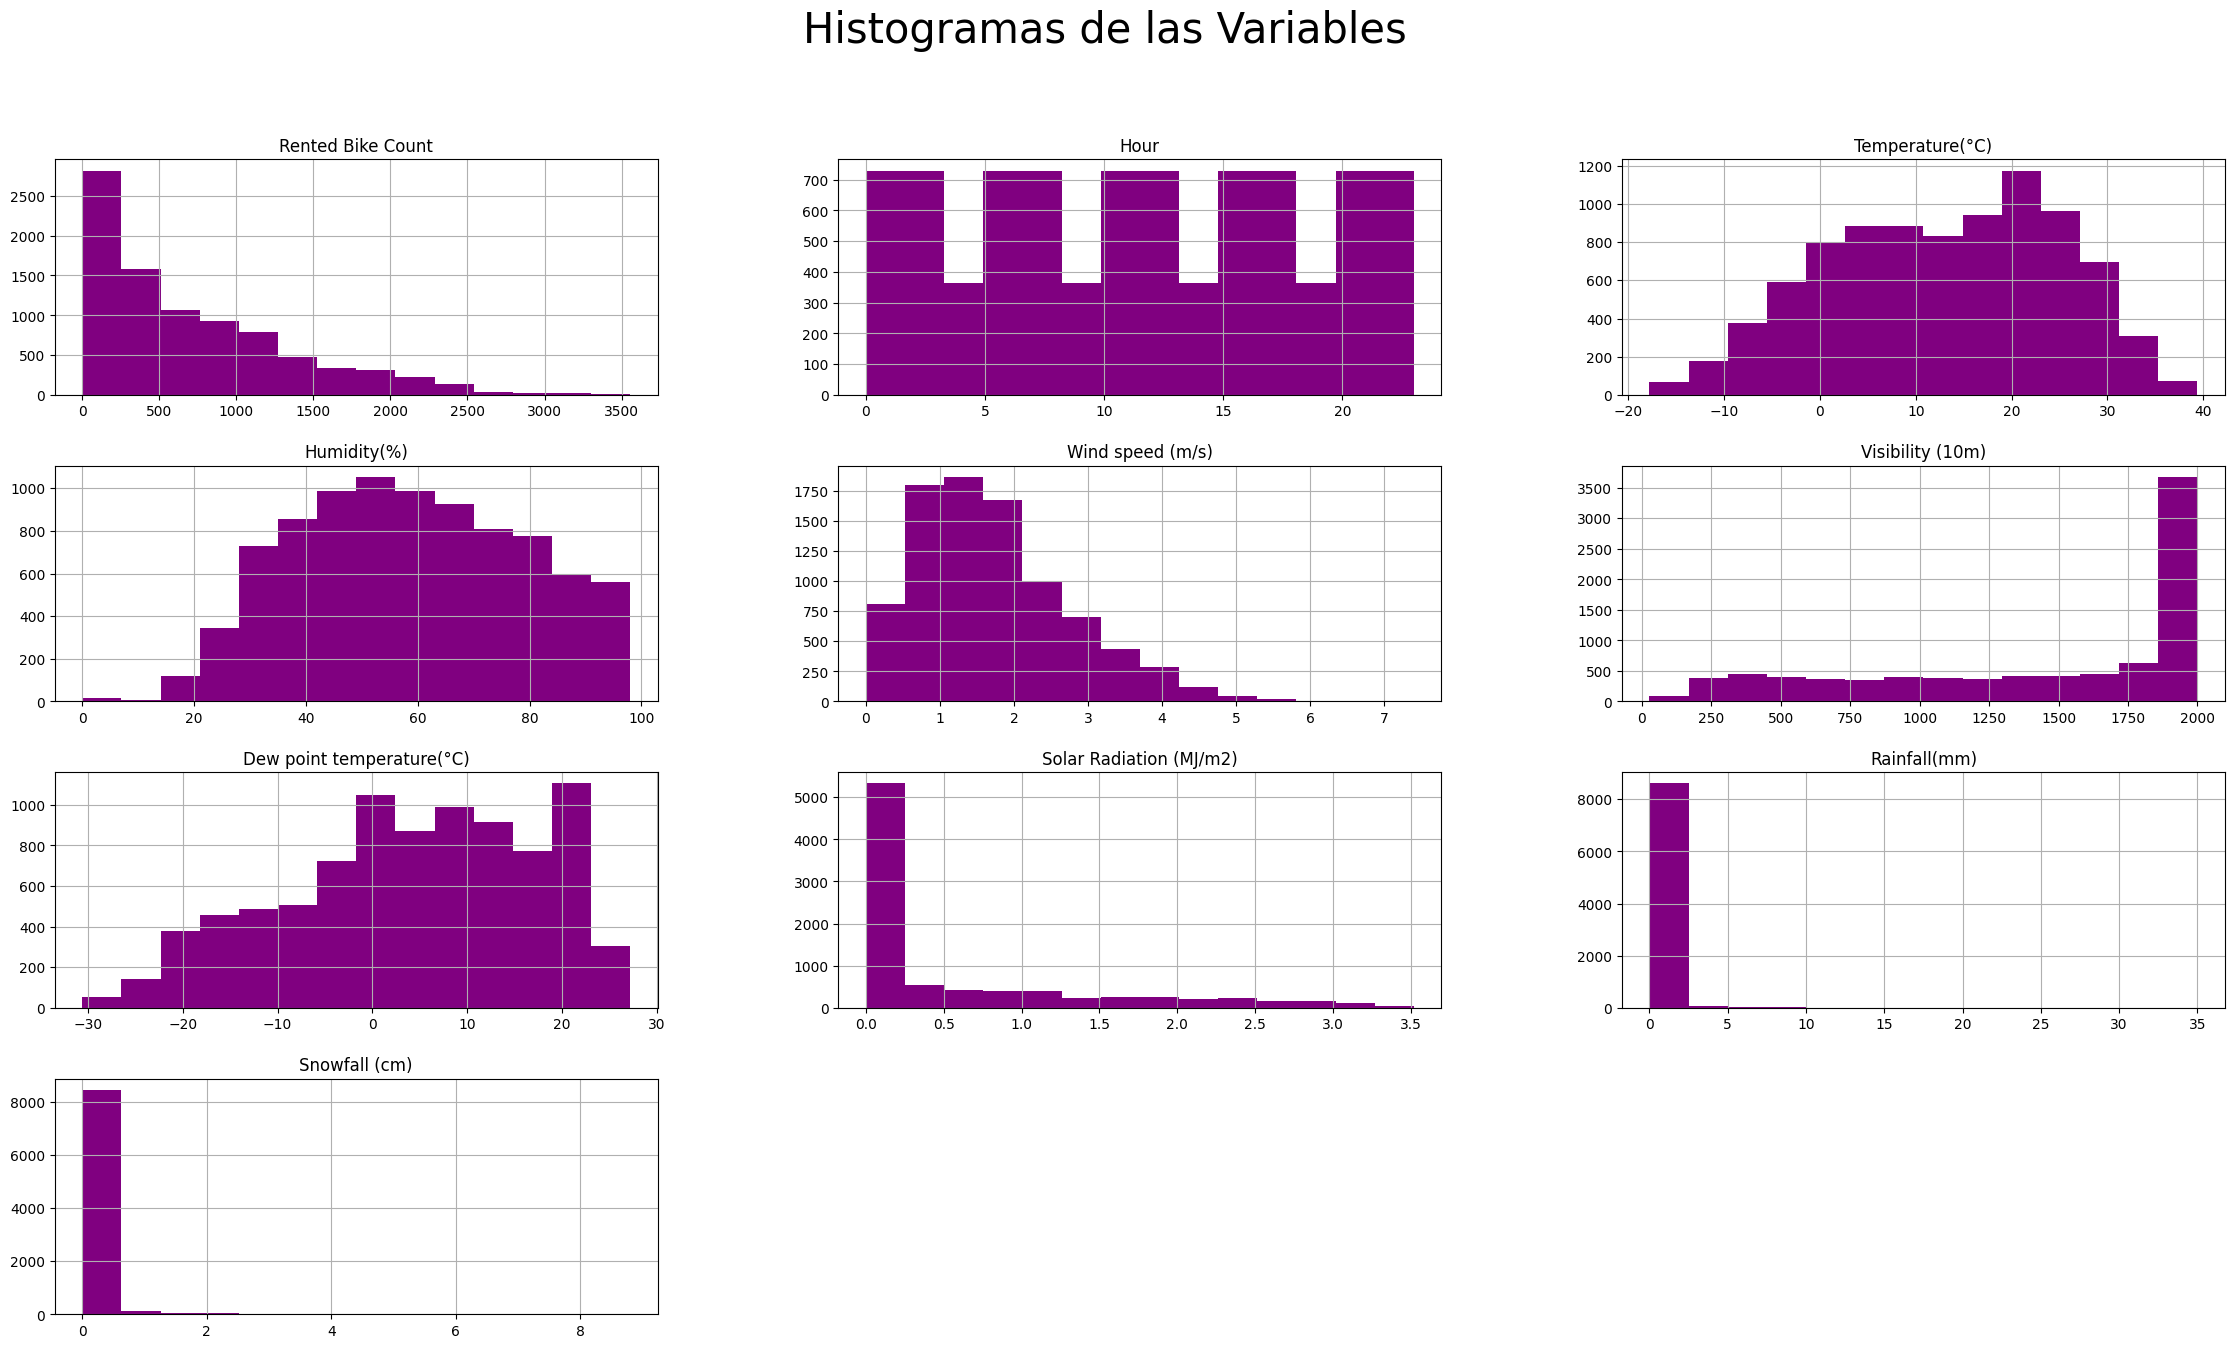

In [ ]:
# Visualización de histogramas
import matplotlib.pyplot as plt
df.hist(figsize=(28, 15), bins=14, color='purple')
plt.suptitle('Histogramas de las Variables', fontsize=30)
plt.show()

## 📈 Gráficos de dispersión

Los gráficos muestran la relación entre cada variable numérica y la variable objetivo `Rented Bike Count`.

### ⏰ `Hour`
- Se observan franjas con mayor uso de bicicletas en ciertos horarios (mañana y tarde).

### 🌡️ `Temperature(°C)`
- A mayor temperatura, la demanda aumenta.

### 💧 `Humidity(%)`
- Dispersión amplia.

### 🌬️ `Wind speed (m/s)`
- Datos muy dispersos.

### 👁️ `Visibility (10m)`
- La mayoría de los valores están en 2000.

### 🌡️ `Dew point temperature(°C)`
- Similar a la temperatura ambiente.

### ☀️ `Solar Radiation (MJ/m2)`
- A más radiación solar, más bicicletas alquiladas.

### 🌧️ `Rainfall(mm)`
- A medida que aumenta la lluvia, cae la demanda.

### ❄️ `Snowfall (cm)`
- Igual que la lluvia: más nieve menos bicicletas.

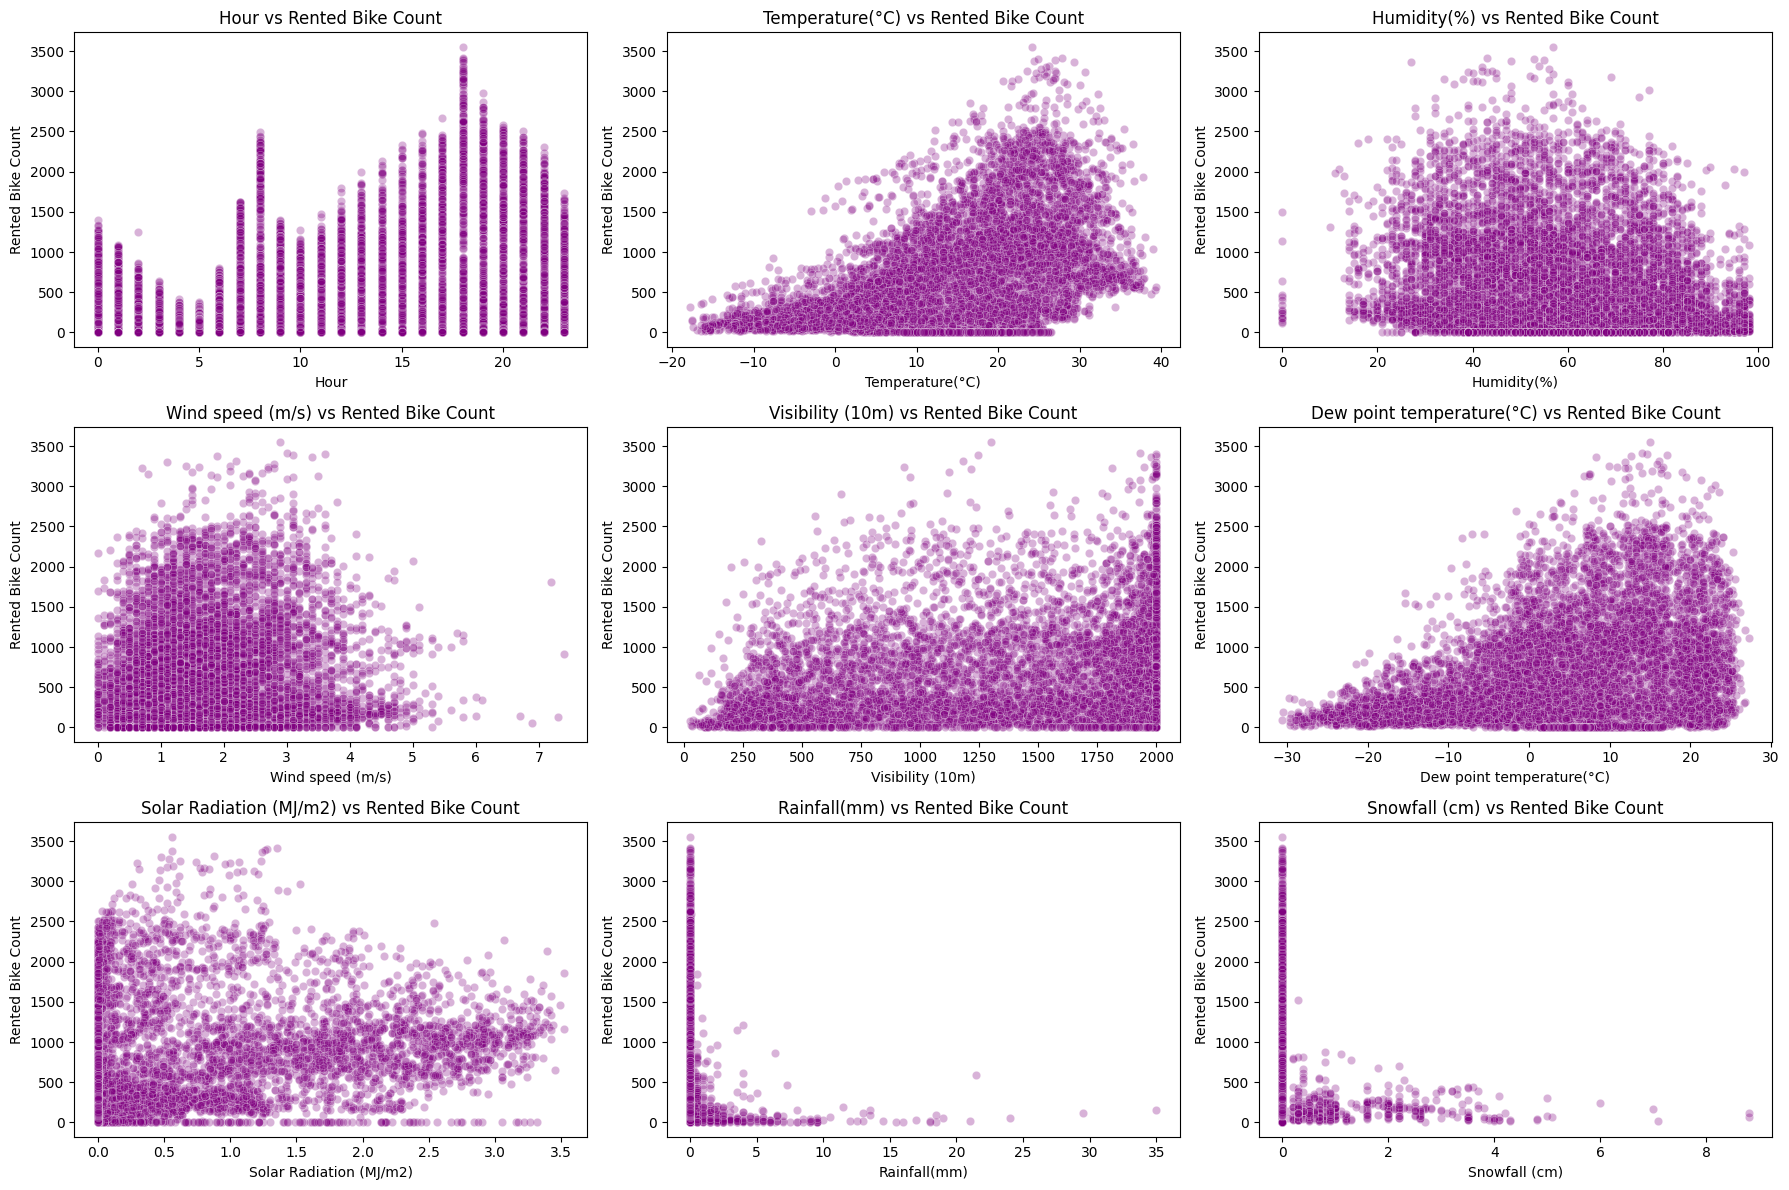

In [ ]:
import seaborn as sns

# Lista de variables numéricas predictoras
features = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
    'Visibility (10m)', 'Dew point temperature(°C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
]

target = 'Rented Bike Count'

# Diseño tipo grilla: 3 columnas por fila
n_col = 3
n_row = (len(features) + n_col - 1) // n_col

# Crear figura general
plt.figure(figsize=(18, n_row * 4))

for i, feature in enumerate(features):
    plt.subplot(n_row, n_col, i + 1)
    sns.scatterplot(x=df[feature], y=df[target], color='purple', alpha=0.3)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


## 📊 Análisis de variables categóricas

Se graficaron las variables categóricas del dataset (`Holiday`, `Functioning Day`, `Seasons`) para analizar su distribución.

### 🎉 `Holiday`
- La gran mayoría de los registros son `"No"`.
- Hay muy pocos días feriados registrados en comparación con los días normales
### ⚙️ `Functioning Day`
- Casi todos los valores son `"Yes"`, con muy pocas excepciones.
- Esto muestra que el sistema de bicicletas estuvo en funcionamiento prácticamente todo el año.
### 🍂 `Seasons`
- Esta variable muestra una distribución más equilibrada entre las 4 estaciones.
- Puede influir en la demanda de bicicletas según el clima.
---


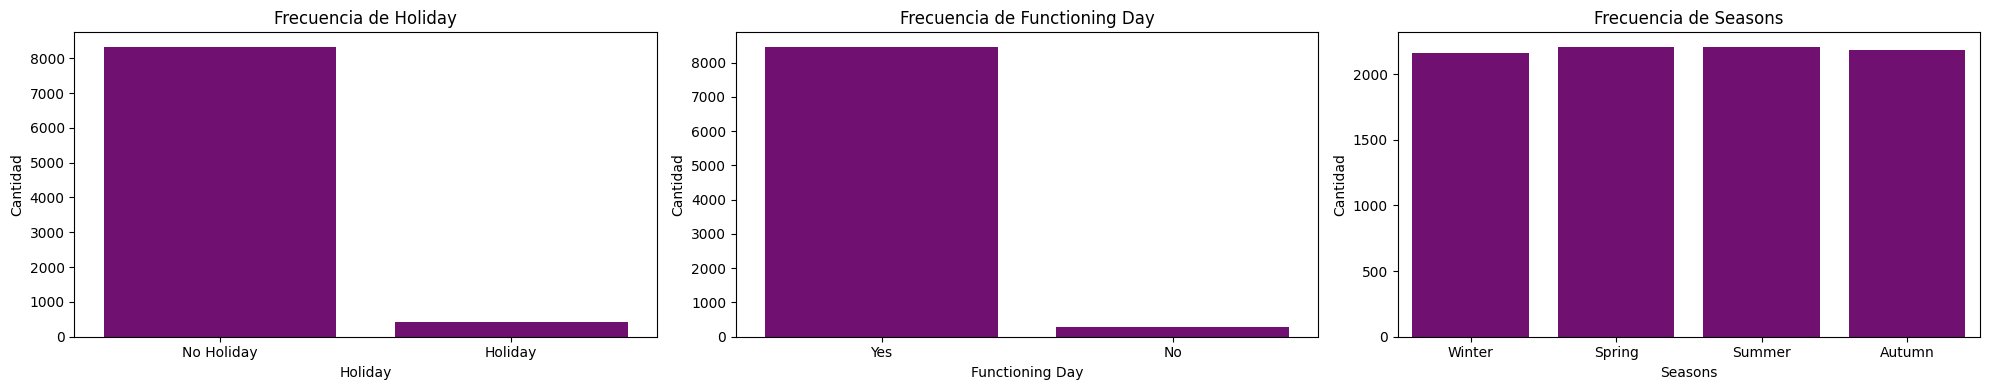

In [ ]:
# Lista de variables categóricas
categorical_features = ['Holiday', 'Functioning Day', 'Seasons']

# Grafico de Barras
plt.figure(figsize=(20, 4))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(x=df[feature], color='purple')
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

## 🧹 Limpieza de variables categóricas

### 🗑️ Variables eliminadas:

- **`Holiday`**: presenta muy poca variabilidad (casi todos los valores son "No").  
- **`Functioning Day`**: más del 99% de los registros indican que el sistema estaba en funcionamiento ("Yes").  
- **`Date`**: es un identificador de tiempo, no usable directamente como variable predictora.

### 🔄 Variable transformada: `Seasons`

La variable `Seasons`, que indica la estación del año, fue **transformada en variables dummies** usando one-hot encoding:
- `Seasons_Spring`  
- `Seasons_Summer`  
- `Seasons_Winter`

✅ Esta transformación permite mantener la información estacional sin introducir multicolinealidad. A partir de este punto, el dataset está compuesto únicamente por variables numericas


In [ ]:
# Eliminar variables
df = df.drop(['Holiday', 'Date', 'Functioning Day'], axis=1)

# Transformar Variables
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)

In [ ]:
# Verificar el dataset
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,True


## 📈 Matriz de correlación

La matriz de correlación permite identificar qué variables numéricas están más relacionadas con la cantidad de bicicletas alquiladas.
### 🔍 Principales observaciones:

- **`Temperature(°C)`** muestra la correlación más alta con el target (**0.54**), seguida de **`Hour` (0.41)** y **`Dew point temperature(°C)` (0.38)**.
- **`Seasons_Summer`** se asocia positivamente (**0.30**) y **`Seasons_Winter`** negativamente (**−0.42**) con la demanda.
- Algunas variables tienen baja o nula relación con el target, como **`Wind speed`** o **`Visibility`**.
- Se detecta una **correlación muy alta entre `Temperature` y `Dew point` (0.91)**.


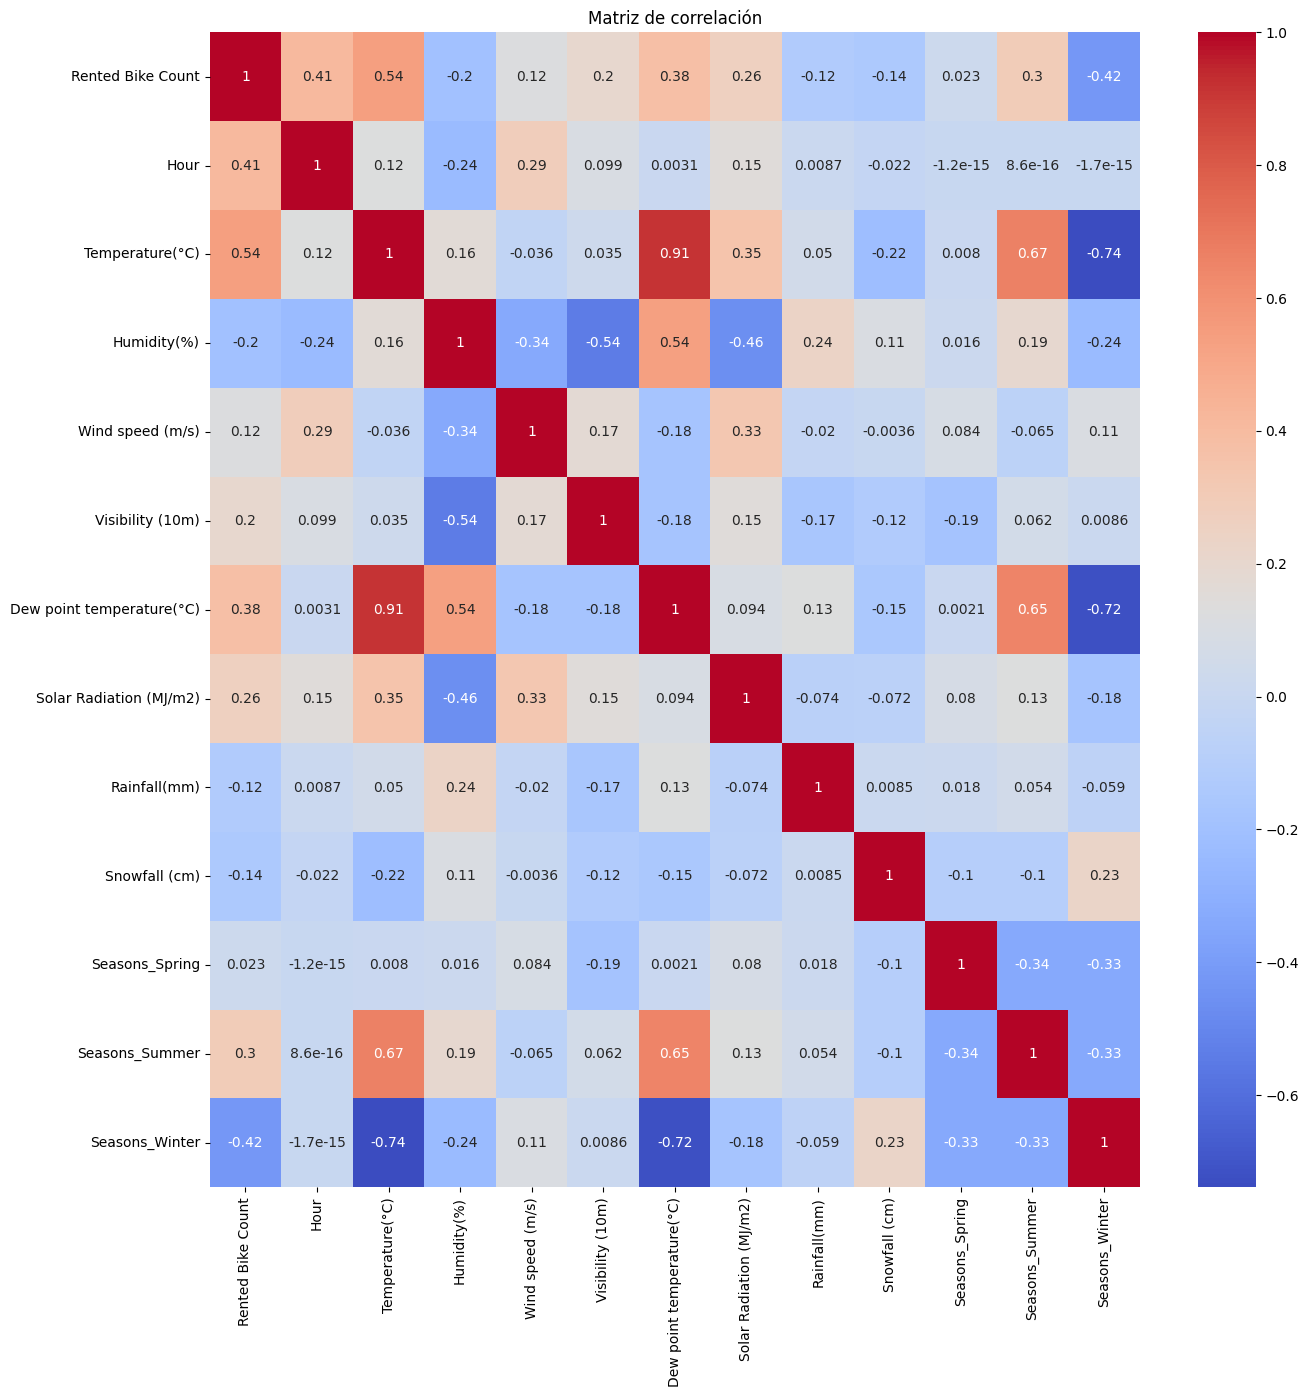

In [ ]:
correlation = df.corr()  # Calcula la matriz de correlación entre variables numéricas

plt.figure(figsize=(15, 15))  # Define el tamaño de la figura
sns.heatmap(correlation, annot=True, cmap='coolwarm')  # Crea el gráfico de calor
plt.title("Matriz de correlación")  # Título del gráfico
plt.show()  # Muestra el gráfico

## 🗑️ Eliminación de variable redundante: Dew point temperature

Para evitar **redundancia** se decidió **eliminar `Dew point temperature(°C)`** y conservar únicamente `Temperature(°C)`.
## Generamos nuevamente la Matriz de Correlacion

In [ ]:
df = df.drop(['Dew point temperature(°C)'], axis=1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,True


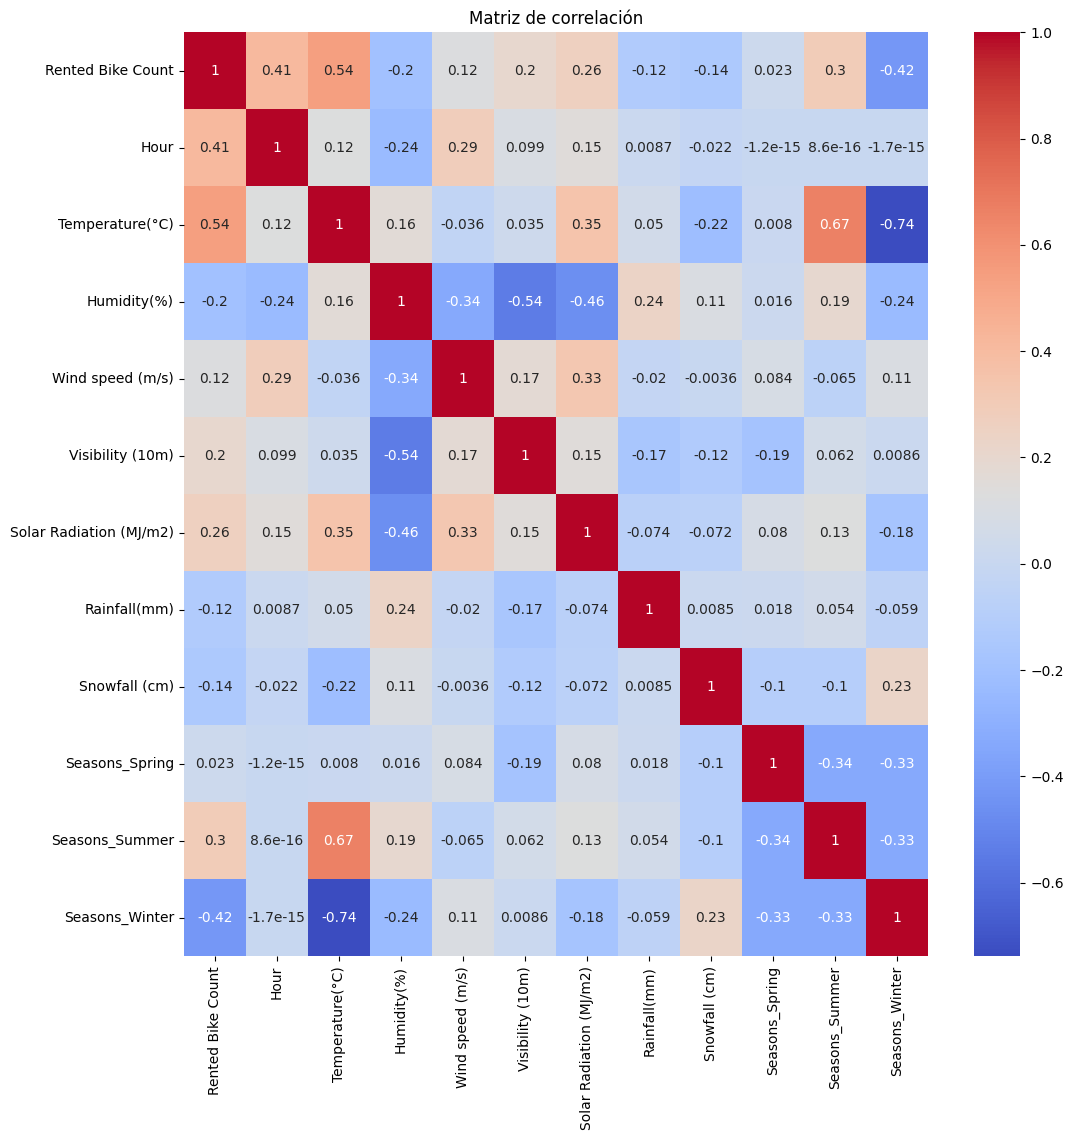

In [ ]:
correlation = df.corr()  # Calcula la matriz de correlación entre variables numéricas

plt.figure(figsize=(12, 12))  # Define el tamaño de la figura
sns.heatmap(correlation, annot=True, cmap='coolwarm')  # Crea el gráfico de calor
plt.title("Matriz de correlación")  # Título del gráfico
plt.show()  # Muestra el gráfico

## 📏 Estandarización de variables numéricas

Las variables numéricas presentan diferentes unidades y escalas (°C, %, mm, m/s, etc.), lo que puede afectar la interpretación de los coeficientes en un modelo de regresión.
Se aplicó el método **StandardScaler**, que transforma cada variable para que tenga:
- Media = 0
- Desviación estándar = 1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables a escalar
features_to_scale = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
    'Visibility (10m)', 'Solar Radiation (MJ/m2)',
    'Rainfall(mm)', 'Snowfall (cm)'
]

# Aplicamos StandardScaler
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,False,False,True
1,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,False,False,True
2,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,False,False,True
3,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,False,False,True
4,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,False,False,True





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Variables predictoras
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']].values
# Variable objetivo (target)
y = df['Rented Bike Count'].values

In [ ]:
# Fijamos la semilla para que la división sea reproducible
np.random.seed(2)

# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Creamos un objeto de la clase LinearRegression
reg_mul = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones del modelo sobre los datos de entrenamiento
y_predict = reg_mul.predict(X_train)

# Métricas de error
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_predict)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_train))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_train))

Error Absoluto Medio (MAE): 343.8319763827821
Error Cuadrático Medio (MSE): 215228.9508138269


In [ ]:
# Obtenemos las predicciones del modelo con los datos de test
y_predict = reg_mul.predict(X_test)

# Calculamos los errores
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_predict)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_test))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_test))

Error Absoluto Medio (MAE): 331.9737401175514
Error Cuadrático Medio (MSE): 209532.59407951264


### 🟢 Conjunto de Entrenamiento
- **MAE (Error Absoluto Medio):** 343.83  
  ➤ En promedio, el modelo se equivoca por unas **344 bicicletas alquiladas**.
- **MSE (Error Cuadrático Medio):** 215228.95  
  ➤ El valor elevado refleja la **presencia de outliers**
### 🔵 Conjunto de Test
- **MAE:** 331.97  
  ➤ Error menor que en entrenamiento.
- **MSE:** 209532.59  
  ➤ Similar al del entrenamiento.
### ✅ Conclusión
- El modelo tiene un **rendimiento consistente** en entrenamiento y testeo.
- No hay señales de **sobreajuste ni subajuste**.

In [ ]:
from sklearn.metrics import r2_score

# R² para entrenamiento
r2_train = r2_score(y_train, reg_mul.predict(X_train))
print("\nR² (train):", r2_train)

# R² para prueba
r2_test = r2_score(y_test, y_predict)
print("R² (test):", r2_test)


R² (train): 0.48274520022973266
R² (test): 0.495676492861038


🔎 El modelo logra explicar aproximadamente el **49% del comportamiento real** del target. Ambos valores son similares por lo tanto el modelo **no presenta sobreajuste**.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [ ]:
# Coeficientes del modelo
reg_mul.coef_

array([ 194.00213854,  280.8885403 , -170.93980353,   15.70972687,
          2.87846384,  -70.76253873,  -62.71892359,   17.09290806,
        -58.09849783,    2.59402429, -315.4509143 ])

In [ ]:
# Mostrar nombre + coeficiente
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
            'Visibility (10m)', 'Solar Radiation (MJ/m2)',
            'Rainfall(mm)', 'Snowfall (cm)',
            'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']
for i in range(len(features)):
    print(features[i], ":", round(reg_mul.coef_[i], 4))

Hour : 194.0021
Temperature(°C) : 280.8885
Humidity(%) : -170.9398
Wind speed (m/s) : 15.7097
Visibility (10m) : 2.8785
Solar Radiation (MJ/m2) : -70.7625
Rainfall(mm) : -62.7189
Snowfall (cm) : 17.0929
Seasons_Spring : -58.0985
Seasons_Summer : 2.594
Seasons_Winter : -315.4509


## 🔍 Análisis de los coeficientes del modelo

El modelo nos muestra cuáles variables tienen mayor impacto sobre la demanda de bicicletas:

- **🌡️ Temperatura**: es la variable con más peso positivo. A mayor temperatura, mayor demanda.
- **❄️ Invierno**: reduce fuertemente la cantidad de bicicletas alquiladas (coef. negativo más alto).
- **💧 Humedad y lluvia**: tienen efectos negativos significativos, lo cual es esperable por el mal clima.
- **🕒 Hora del día**: tiene influencia positiva: las horas más activas del día implican más uso.
- **☀️ Radiación solar**: tiene impacto negativo, posiblemente porque el exceso de sol desincentiva el uso.

✅ Esto nos permite entender qué factores climáticos y temporales explican mejor la demanda.



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

### 📌 Variables más importantes

Luego de entrenar el modelo y analizar los coeficientes, se identificó que las variables con mayor impacto en la demanda de bicicletas fueron:

- **🌡️ Temperatura**: tuvo el mayor coeficiente positivo. Cuanto más cálido el día, más bicicletas se alquilan.
- **🕒 Hora del día**: mostró un fuerte efecto positivo, especialmente en horas pico.
- **❄️ Invierno**: tuvo el coeficiente negativo más alto, indicando que durante esta estación la demanda baja fuertemente.
- **💧 Humedad y lluvia**: mostraron impacto negativo importante, lo que tiene sentido por el mal clima.
- **☀️ Radiación solar**: curiosamente presentó un efecto negativo. Podría deberse a colinealidad o condiciones extremas poco representadas.

✅ Estos resultados coinciden en general con los gráficos del análisis exploratorio (histogramas, dispersión y correlación).

### 📊 Rendimiento del modelo

El modelo de regresión lineal logró los siguientes resultados:

- **R² (entrenamiento)**: 0.48
- **R² (test)**: 0.49
- **MAE**: entre 330 y 340 bicicletas

Esto indica que el modelo es **moderadamente bueno**, explicando alrededor del **50% de la variabilidad** en la demanda de bicicletas. Además, como los resultados fueron similares en entrenamiento y test, **no hay indicios de sobreajuste**.

### 🤔 Posibles limitaciones

- Hay factores externos que no están en el dataset y que podrían influir (eventos, feriados, disponibilidad de bicicletas).
- Algunas variables pueden estar correlacionadas entre sí, lo que afecta la precisión de los coeficientes.

✅ En conclusión, el modelo de regresión lineal fue una herramienta útil para entender la influencia del clima, la hora y la estación en el uso de bicicletas.



## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [ ]:
# 1. Seleccionamos solo las variables más importantes
X_simplificado = df[['Hour', 'Temperature(°C)', 'Humidity(%)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
                     'Seasons_Spring', 'Seasons_Winter']].values
y = df['Rented Bike Count'].values

# 2. División en entrenamiento y prueba
np.random.seed(2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simplificado, y, test_size=0.2)

# 3. Entrenamiento del modelo
modelo_simple = linear_model.LinearRegression()
modelo_simple.fit(X_train_s, y_train_s)

# 4. Evaluación en entrenamiento
y_pred_train_s = modelo_simple.predict(X_train_s)
mae_train_s = mean_absolute_error(y_train_s, y_pred_train_s)
mse_train_s = mean_squared_error(y_train_s, y_pred_train_s)
r2_train_s = r2_score(y_train_s, y_pred_train_s)

# 5. Evaluación en prueba
y_pred_test_s = modelo_simple.predict(X_test_s)
mae_test_s = mean_absolute_error(y_test_s, y_pred_test_s)
mse_test_s = mean_squared_error(y_test_s, y_pred_test_s)
r2_test_s = r2_score(y_test_s, y_pred_test_s)

# 6. Resultados
print("=== Entrenamiento ===")
print(f"MAE: {mae_train_s:.2f}")
print(f"MSE: {mse_train_s:.2f}")
print(f"R²: {r2_train_s:.4f}")

print("\n=== Test ===")
print(f"MAE: {mae_test_s:.2f}")
print(f"MSE: {mse_test_s:.2f}")
print(f"R²: {r2_test_s:.4f}")


=== Entrenamiento ===
MAE: 344.12
MSE: 215703.18
R²: 0.4816

=== Test ===
MAE: 332.19
MSE: 209626.94
R²: 0.4954


Variables seleccionadas:
- `Hour`
- `Temperature(°C)`
- `Humidity(%)`
- `Seasons_Winter`

Se eliminaron las siguientes variables por tener coeficientes bajos.
- `Wind speed (m/s)`
- `Visibility (10m)`
- `Solar Radiation (MJ/m2)`
- `Rainfall(mm)`
- `Snowfall (cm)`
- `Seasons_Spring`
- `Seasons_Summer`


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
